# Project Ruby

Customer survey analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
image_directory="images/"
image_extension="png"

def save_figure(fig, filename):
    filepath = image_directory + filename + "." + image_extension
    fig.savefig(filepath)

In [3]:
NORMAL_SIZE = 12
#BIGGER_SIZE = 14
#BIGGEST_SIZE = 16

plt.rc('font', size=NORMAL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=NORMAL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=NORMAL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=NORMAL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

sns.set(font_scale=1.1)

# Data Preparation

In [10]:
survey_data = pd.read_csv("clean_survey_data.csv");
display(survey_data.shape) # rows & columns

(292, 60)

In [28]:
display(survey_data.isnull().sum()) # display null values

Gender                              0
Age                                 0
Income                              0
Education                           0
Relationship_Status                 0
Residence                           0
Home                                0
Number_Dogs                         0
Dog_Weights                         0
Weights_Less_10                     0
Weights_11_25                       0
Weights_91_120                      0
Weights_71_90                       0
Weights_41_70                       0
Weights_26_40                       0
Weights_Greater_120                 0
Security_Cameras                    0
Spend_Insurance                     0
Spend_Food                          0
Spend_Boarding                      0
Spend_Grooming                      0
Service_Animal                      0
Car_Seat                            0
Car_Seat_Retail                   141
Exercise                            0
Activities_Walk                     0
Activities_R

In [29]:
# display(survey_data.isnull().sum()) # display null values

# replace nulls with 0 in numeric fields
replace_nulls_cols = ['Spend_Insurance', 'Spend_Food', 'Spend_Boarding', 'Spend_Grooming']
survey_data[replace_nulls_cols] = survey_data[replace_nulls_cols].fillna(0)

# display(survey_data.isnull().sum()) # display missing values

# Visualize the Data

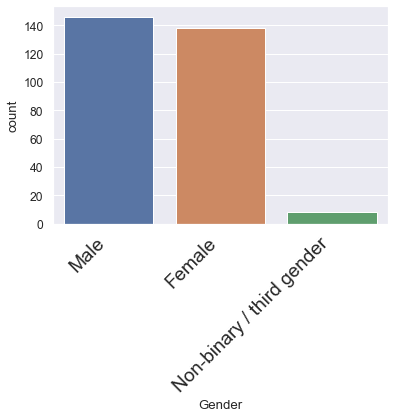

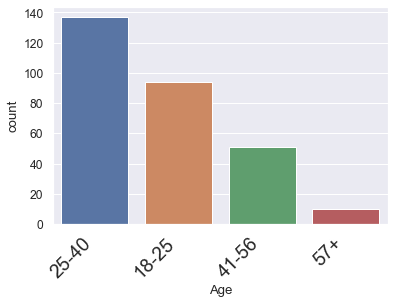

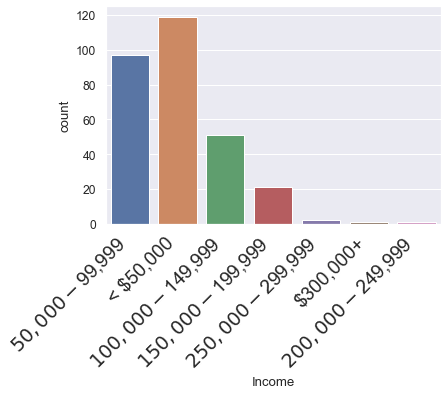

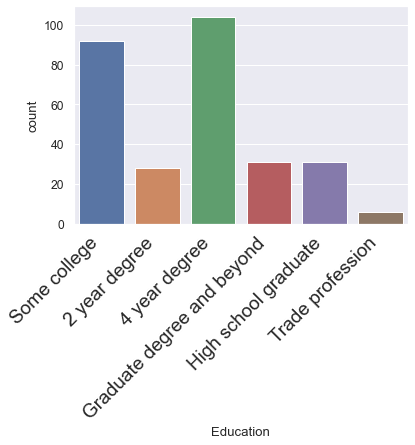

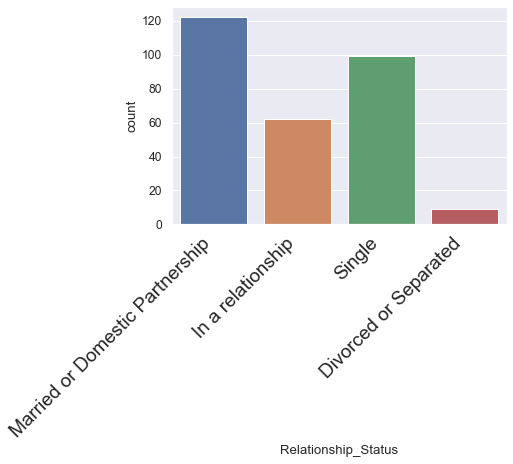

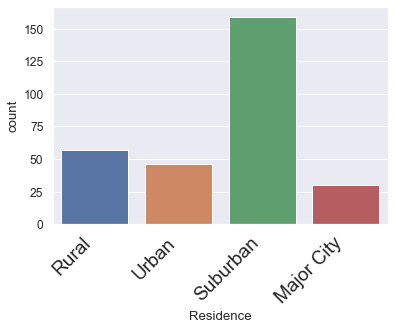

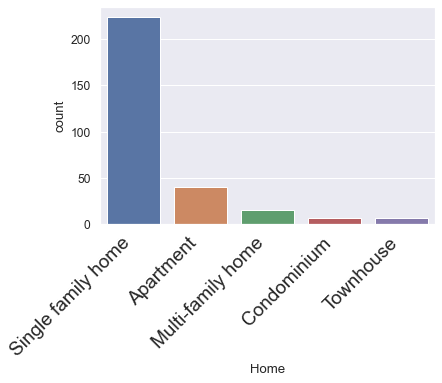

In [34]:
def rotate_xlabels(chart):
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'
    )
    
def create_countplot(column):
    chart = sns.countplot(data=survey_data, x=column);
    rotate_xlabels(chart);
    save_figure(fig, '3_1_'+column);
    plt.show()
    
create_countplot("Gender")
create_countplot("Age")
create_countplot("Income")
create_countplot("Education")
create_countplot("Relationship_Status")
create_countplot("Residence")
create_countplot("Home")

In [ ]:
#Number_Dogs                        object
#Dog_Weights                        object
#Weights_Less_10                      bool
#Weights_11_25                        bool
#Weights_91_120                       bool
#Weights_71_90                        bool
#Weights_41_70                        bool
#Weights_26_40                        bool
#Weights_Greater_120                  bool
#Security_Cameras                   object
#Spend_Insurance                   float64
#Spend_Food                        float64
#Spend_Boarding                    float64
#Spend_Grooming                    float64
#Service_Animal                     object
#Car_Seat                           object
#Car_Seat_Retail                    object
#Exercise                           object
#Activities_Walk                     int64
#Activities_Run                      int64
#Activities_Hunt                     int64
#Activities_Dog_Parks                int64
#Activities_Outdoor_Adventures       int64
#Activities_Shopping                 int64
#Activities_Vacation                 int64
#Walking_Assistance                 object
#Vehicle_Types                      object
#Concern_Safety                     object
#Accidents                          object
#Accident_with_Dog                  object
#Dog_Injured_Accident               object
#Dog_Insurance_Claim                object
#Restrain_Dog                       object
#Paid_Restraint                    float64
#Restraint_Influence_Online          int64
#Restraint_Influence_Retail          int64
#Restraint_Influence_Price           int64
#Restraint_Influence_Aesthetics      int64
#Influence_Removable                 int64
#Influence_Stain                     int64
#Influence_Lightweight               int64
#Influence_Sturdy                    int64
#Pay_Basic_100                      object
#Pay_Basic_200                      object
#Pay_Revolutionary_100              object
#Pay_Revolutionary_200              object
#Pay_Fact_100                       object
#Pay_Fact_200                       object
#Pay_Law_100                        object
#Pay_Law_200                        object
#Pay_All_100                        object
#Pay_All_200                        object
#Maximum_Pay                         int64